<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3      

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_19640\1529145062.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
C:\Users\DELL G15\AppData\Local\Temp\ipykernel_19640\1529145062.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

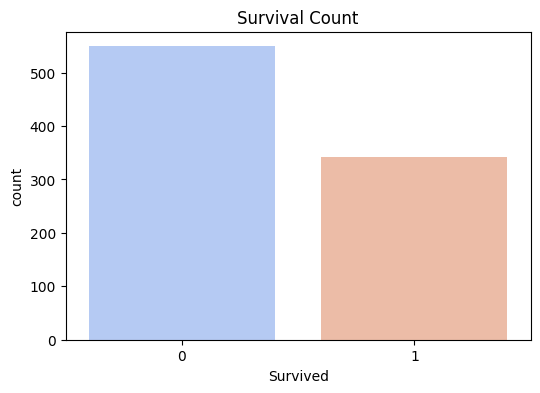

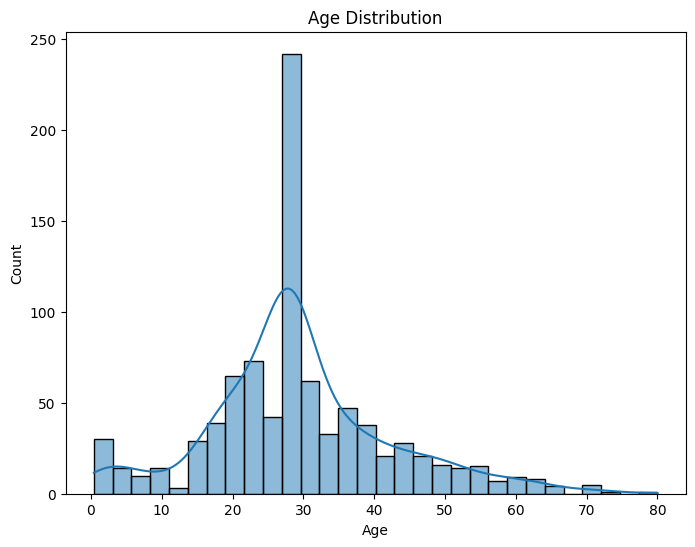

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_19640\1529145062.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='coolwarm')


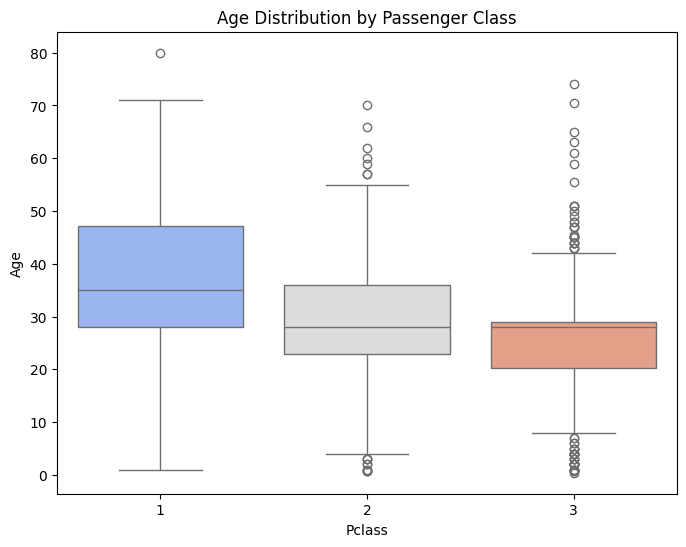

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_19640\1529145062.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')


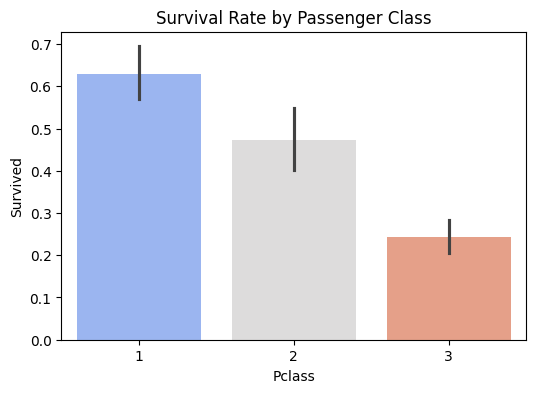

C:\Users\DELL G15\AppData\Local\Temp\ipykernel_19640\1529145062.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')


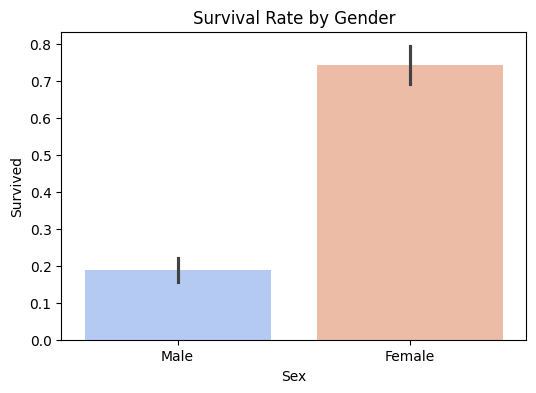

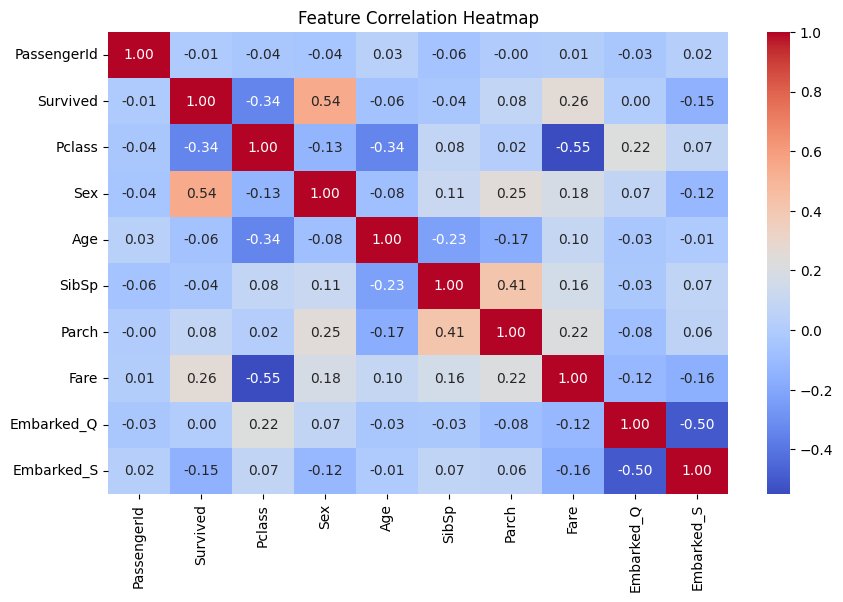


EDA and data cleaning completed successfully.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Drop non-numeric columns that are not useful for correlation
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Display basic info about the dataset
print(df.info())
print(df.head())

# Handling missing values
print("\nMissing values before handling:\n", df.isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
df.drop(columns=['Cabin'], inplace=True)  # Drop Cabin due to too many missing values

print("\nMissing values after handling:\n", df.isnull().sum())

# Data transformation and encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert categorical to numerical
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encoding

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Passenger Class')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
print("\nEDA and data cleaning completed successfully.")
